In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [173]:
df=pd.read_csv('dataset.csv')

In [174]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [175]:
df.shape
## said data have 303 records and 13 columns 

(303, 14)

In [176]:
## as the data is loaded , now we do the EDA over the data for any missing values and data type 
df.isnull().sum()

## it seems there are no null values present in the data 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [177]:
df.info()
## data provided is in int and float type lets see for correlation b/w the data also setting a thresthold and eliminating the most correlate data points will help 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [178]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot: >

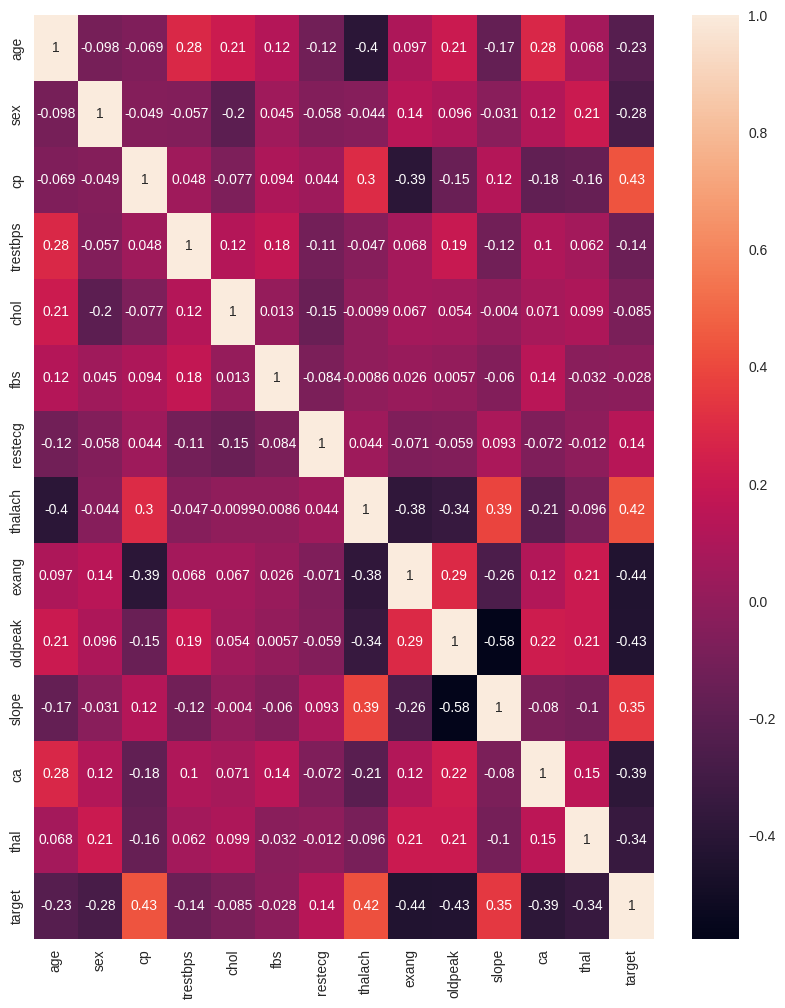

In [179]:
plt.figure(figsize=(10,12))
sns.heatmap(data=df.corr(),annot=True)
## now we have the correlation b/w the data we can check for most correlated columns 

In [181]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/tmp/ipykernel_799/3383878817.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


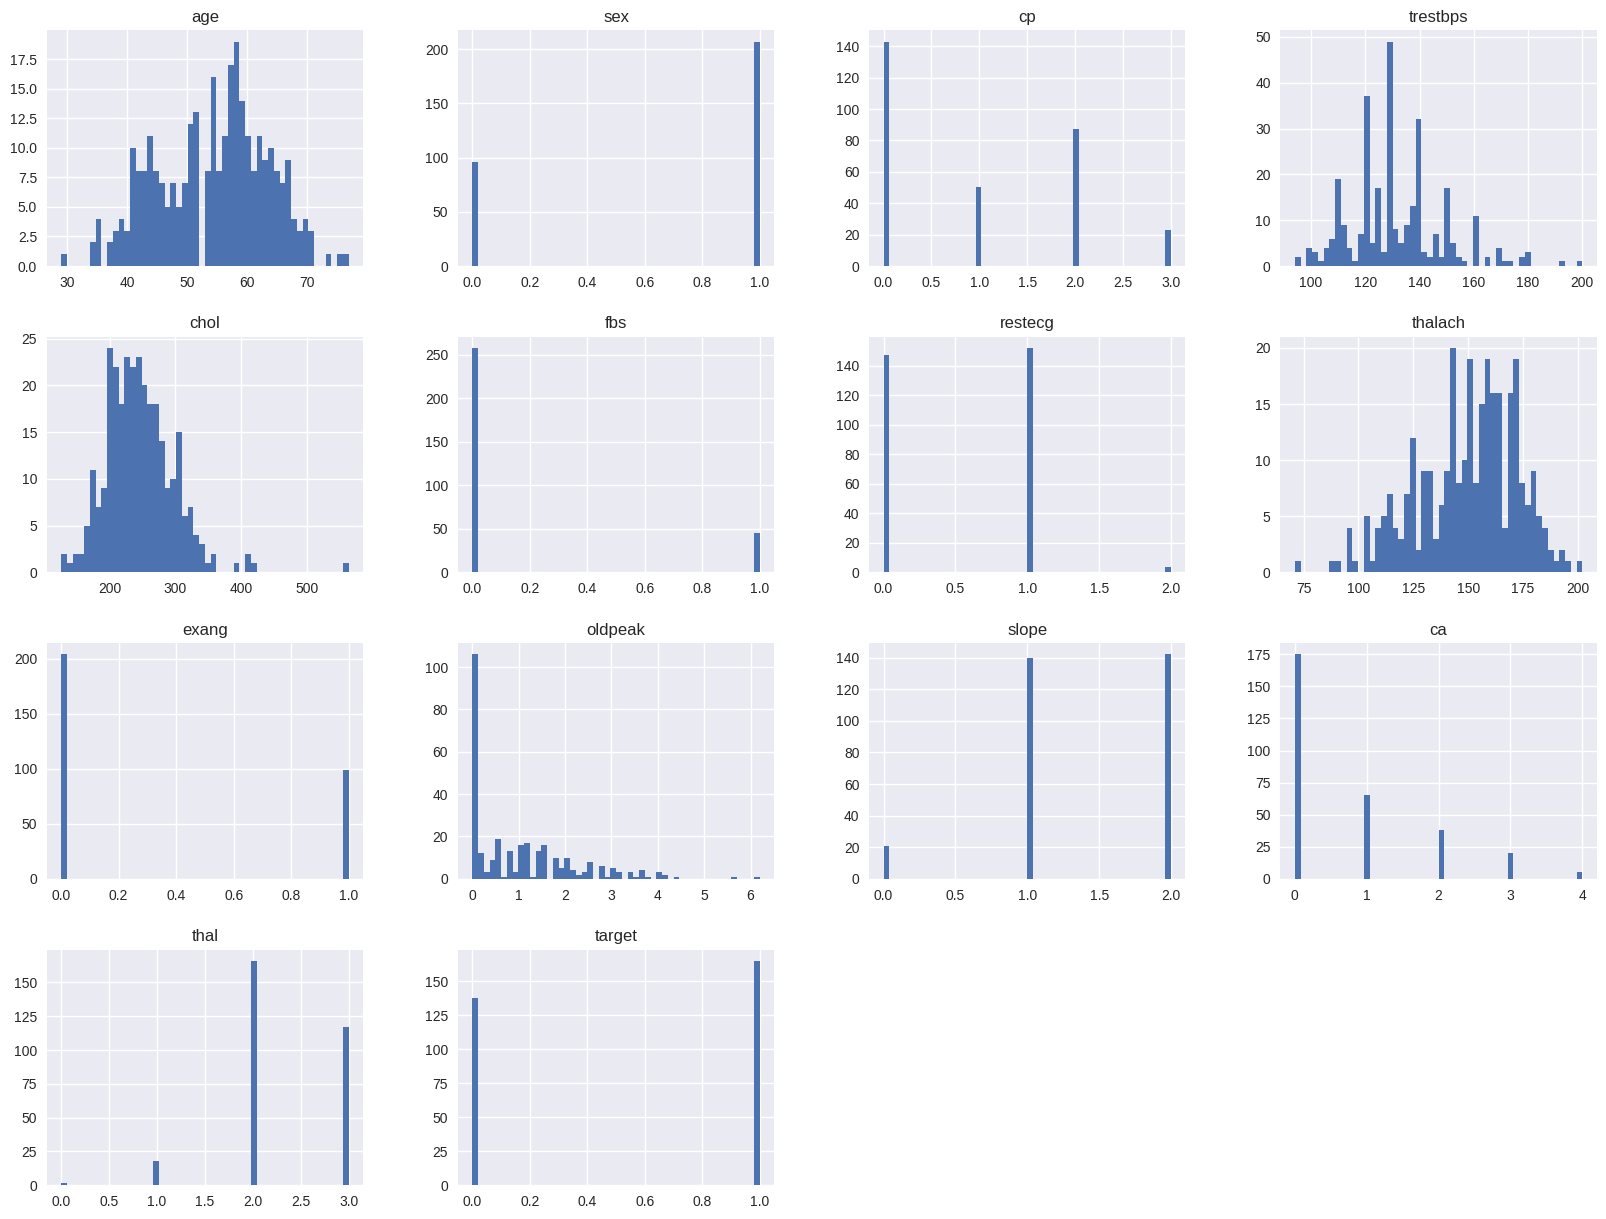

In [182]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()
## it seems data is not scaled properly and needs scaling 

In [183]:
def corr_rel(dataset,threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j]) > threshold:
                colname=col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [184]:
corr_rel(df,0.85)
# it seems there are no data that are correlated , therfore we will check for feature scaling 

set()

<AxesSubplot: >

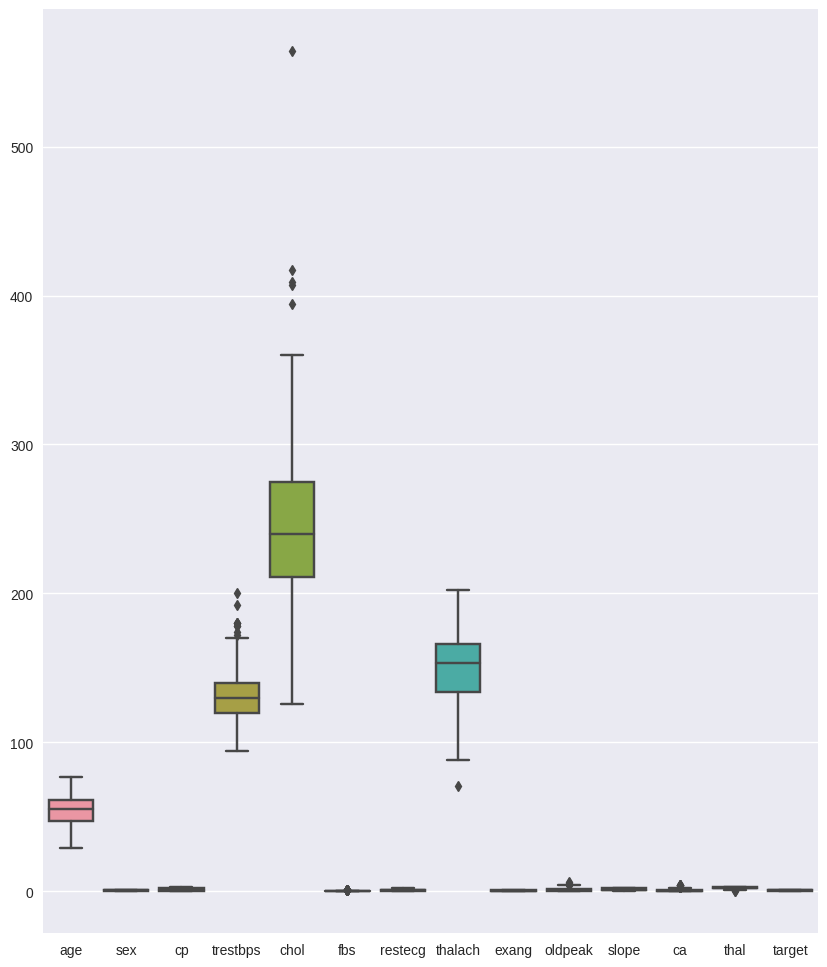

In [82]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df)
#feature scaling is required 

In [83]:
from sklearn.preprocessing import StandardScaler

In [185]:
df.head()
df['target'].unique()
#we will divide the data set into train and test independent and dependent feature 

array([1, 0])

In [186]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.70,random_state=42)

In [188]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [189]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [89]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

/tmp/ipykernel_799/3115946886.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: >

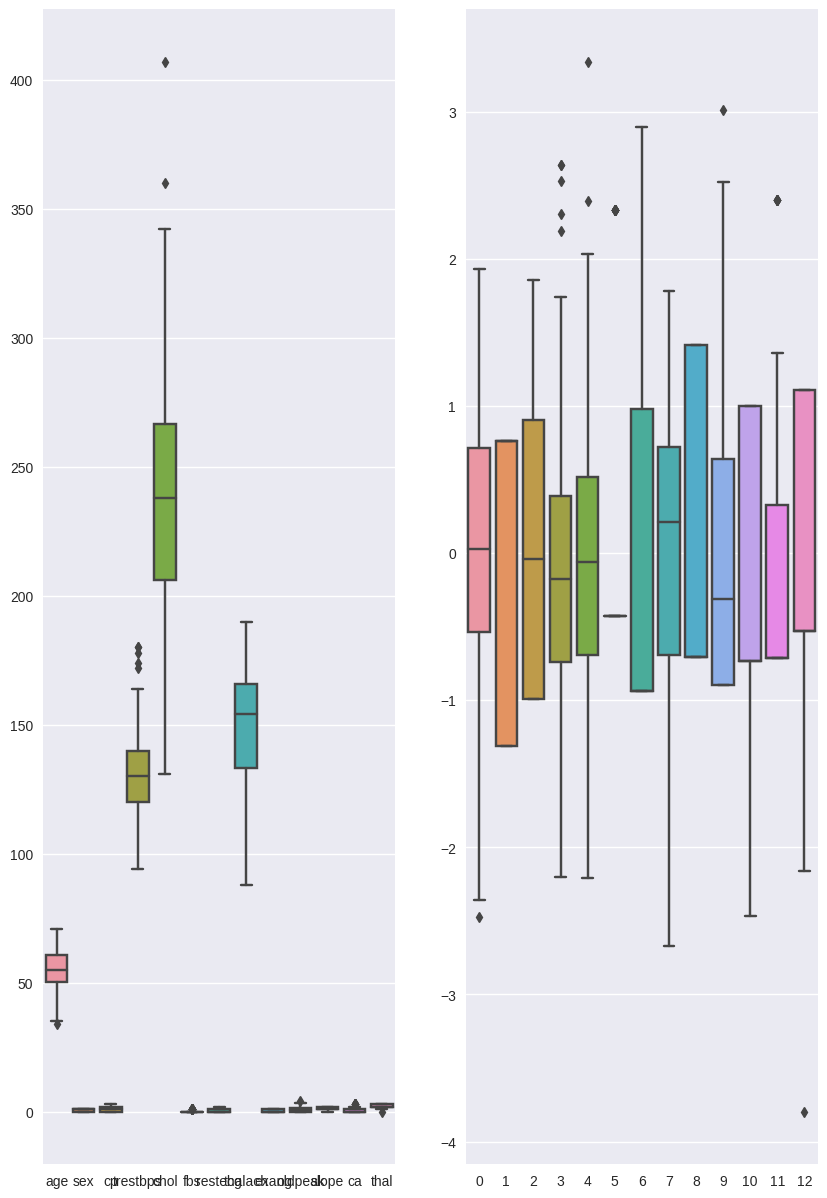

In [93]:
plt.subplots(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
## feature scaling is done now we can proceed for Forest regression 

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import OneHotEncoder## handling Categorical features
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [191]:
## we will create a pipeline for the model for future inputs 
numerical_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','thalach','exang','oldpeak','slope','ca','thal']

In [192]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##missing values
        ('scaler',StandardScaler())## feature scaling 
    ]

)

In [193]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols)

])

In [194]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
models={'Randomforest':RandomForestClassifier()}

In [197]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [211]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)
        pre_sc=precision_score(y_test,y_test_pred)
        re_sc=recall_score(y_test,y_test_pred)
        

        report[list(models.keys())[i]] =  test_model_score
        report[list(models.keys())[i]] =  pre_sc
        report[list(models.keys())[i]] =  re_sc
        
    return report
            

            

In [213]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Randomforest': 0.8448275862068966}

In [214]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [220]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':(1,10,15),
    'max_features':['sqrt', 'log2',None]
}

In [221]:
clg=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5,verbose=3,refit=True)

In [222]:
clg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2;, score=0.722 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2;, score=0.778 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2;, score=0.833 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2;, score=0.889 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2;, score=0.722 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=1, max_features=sqrt;, score=0.778 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=1, max_features=sqrt;, score=0.889 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=1, max_features=sqrt;, score=0.722 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=1, max_features=sqrt;, score=0.833 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=1, max_features=sqrt;, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': (1, 10, 15),
                                        'max_features': ['sqrt', 'log2', None]},
                   verbose=3)

In [223]:
clg.best_params_

{'max_features': 'sqrt', 'max_depth': 1, 'criterion': 'entropy'}

In [225]:
new_data=RandomForestClassifier(max_features='sqrt',max_depth=1,criterion='entropy')

In [226]:
new_data.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=1)

In [227]:
y_pred_new=new_data.predict(X_test)

In [230]:
new_data.predict_proba(X_test)

array([[0.63211879, 0.36788121],
       [0.41883009, 0.58116991],
       [0.41175572, 0.58824428],
       [0.66471691, 0.33528309],
       [0.39425298, 0.60574702],
       [0.30800609, 0.69199391],
       [0.42627796, 0.57372204],
       [0.7402105 , 0.2597895 ],
       [0.65234834, 0.34765166],
       [0.38791803, 0.61208197],
       [0.40758025, 0.59241975],
       [0.50288944, 0.49711056],
       [0.24937701, 0.75062299],
       [0.65608267, 0.34391733],
       [0.24109462, 0.75890538],
       [0.24084538, 0.75915462],
       [0.28496838, 0.71503162],
       [0.675978  , 0.324022  ],
       [0.73349942, 0.26650058],
       [0.63177297, 0.36822703],
       [0.45414404, 0.54585596],
       [0.67156966, 0.32843034],
       [0.54351858, 0.45648142],
       [0.3531411 , 0.6468589 ],
       [0.36636635, 0.63363365],
       [0.4203124 , 0.5796876 ],
       [0.34856756, 0.65143244],
       [0.36479199, 0.63520801],
       [0.70288165, 0.29711835],
       [0.35563892, 0.64436108],
       [0.